# AST 4930 Module 3

## Support vector machines

### Let's load the scikit-learn module and load the Iris dataset.

In [25]:
from sklearn import datasets

iris = datasets.load_iris()

### Let's visualize the data. Petal width vs. Petal length

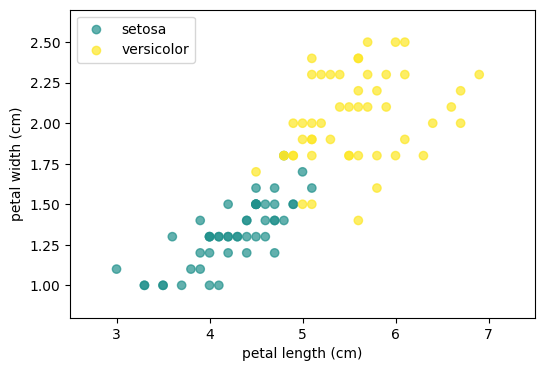

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))

norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

setosa = ax.scatter(iris.data[:,2][iris.target == 1], iris.data[:,3][iris.target == 1], 
                    alpha=0.7, c=iris.target[iris.target == 1], cmap='viridis', norm=norm)

versicolor = ax.scatter(iris.data[:,2][iris.target == 2], iris.data[:,3][iris.target == 2], 
                        alpha=0.7, c=iris.target[iris.target == 2], cmap='viridis', norm=norm)

ax.set_xlim(2.5,7.5)
ax.set_ylim(0.8,2.7)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend([setosa, versicolor], iris.target_names[0:2], loc='upper left')

plt.savefig('iris.png',dpi=300)

In [27]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split

# Using petal width/length only.
X = iris.data[:,2:]
y = (iris.target == 2).astype(np.float64)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# We need feature scaling for SVM.
scaler = StandardScaler()

# Here I'm making three linear SVM Classification models with three different C values.
svm_clf1 = LinearSVC(C=1, random_state=0)
svm_clf2 = LinearSVC(C=100, random_state=0)
svm_clf3 = LinearSVC(C=0.1, random_state=0)

# Making pipelines.
scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])
scaled_svm_clf3 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf3),
    ])

# Fit the data.
scaled_svm_clf1.fit(X_train, y_train)
scaled_svm_clf2.fit(X_train, y_train)
scaled_svm_clf3.fit(X_train, y_train)

/Users/jbae/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/jbae/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/jbae/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jbae/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=0.1, random_state=0))])

In [28]:
print(scaled_svm_clf1.score(X_test, y_test),
      scaled_svm_clf2.score(X_test, y_test),
      scaled_svm_clf3.score(X_test, y_test))

0.9736842105263158 0.9736842105263158 0.9736842105263158


In [29]:
# This cell is to visualize the support vectors and margins.
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# See https://github.com/ageron/handson-ml/issues/250 for how the math below works!

# Convert to unscaled parameters
# help(scaler)
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
b3 = svm_clf3.decision_function([-scaler.mean_ / scaler.scale_])

w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
w3 = svm_clf3.coef_[0] / scaler.scale_

svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf3.intercept_ = np.array([b3])

svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])
svm_clf3.coef_ = np.array([w3])

# Find support vectors (LinearSVC does not do this automatically). 
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
support_vectors_idx3 = (t * (X.dot(w3) + b3) < 1).ravel()

svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]
svm_clf3.support_vectors_ = X[support_vectors_idx3]

In [30]:
t

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [31]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=120, edgecolors='black', facecolors='none', alpha=0.5)
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

### Make a plot for the model with C=1

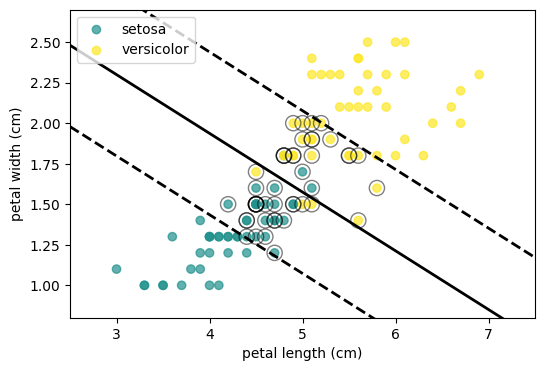

In [32]:
fig, ax = plt.subplots(figsize=(6, 4))

norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

setosa = ax.scatter(iris.data[:,2][iris.target == 1], iris.data[:,3][iris.target == 1], 
                    alpha=0.7, c=iris.target[iris.target == 1], cmap='viridis', norm=norm)

versicolor = ax.scatter(iris.data[:,2][iris.target == 2], iris.data[:,3][iris.target == 2], 
                        alpha=0.7, c=iris.target[iris.target == 2], cmap='viridis', norm=norm)

plot_svc_decision_boundary(svm_clf1, 2.5, 7.5)

ax.set_xlim(2.5,7.5)
ax.set_ylim(0.8,2.7)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend([setosa, versicolor], iris.target_names[0:2], loc='upper left')

plt.savefig('iris_SVM_C1.png',dpi=300)

### Make a plot for the model with C=100

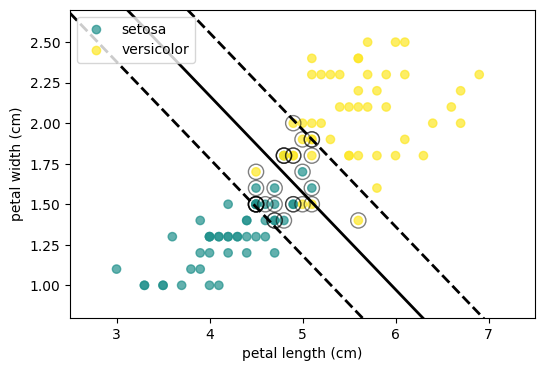

In [33]:
fig, ax = plt.subplots(figsize=(6, 4))

norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

setosa = ax.scatter(iris.data[:,2][iris.target == 1], iris.data[:,3][iris.target == 1], 
                    alpha=0.7, c=iris.target[iris.target == 1], cmap='viridis', norm=norm)

versicolor = ax.scatter(iris.data[:,2][iris.target == 2], iris.data[:,3][iris.target == 2], 
                        alpha=0.7, c=iris.target[iris.target == 2], cmap='viridis', norm=norm)

plot_svc_decision_boundary(svm_clf2, 2.5, 7.5)


ax.set_xlim(2.5,7.5)
ax.set_ylim(0.8,2.7)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend([setosa, versicolor], iris.target_names[0:2], loc='upper left')
plt.savefig('iris_SVM_C100.png',dpi=300)

### Make a plot for the model with C=0.1

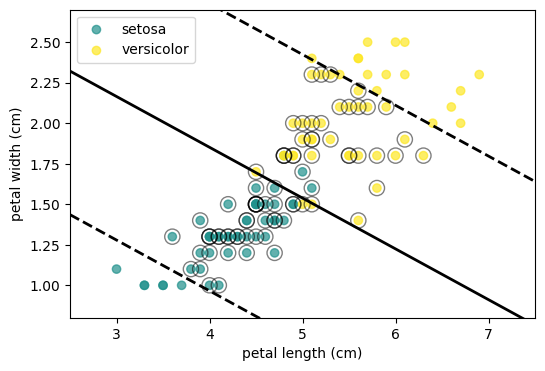

In [34]:
fig, ax = plt.subplots(figsize=(6, 4))

norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

setosa = ax.scatter(iris.data[:,2][iris.target == 1], iris.data[:,3][iris.target == 1], 
                    alpha=0.7, c=iris.target[iris.target == 1], cmap='viridis', norm=norm)

versicolor = ax.scatter(iris.data[:,2][iris.target == 2], iris.data[:,3][iris.target == 2], 
                        alpha=0.7, c=iris.target[iris.target == 2], cmap='viridis', norm=norm)

plot_svc_decision_boundary(svm_clf3, 2.5, 7.5)


ax.set_xlim(2.5,7.5)
ax.set_ylim(0.8,2.7)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend([setosa, versicolor], iris.target_names[0:2], loc='upper left')
plt.savefig('iris_SVM_C01.png',dpi=300)

### Multi-class classification with SVM

In [35]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:,2:]
y = iris.target

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

model = Pipeline([
    ('sc', StandardScaler()),
    ('svm', SVC(C=1, kernel="linear", decision_function_shape='ovo', random_state=0))
])

model.fit(X, y)

Pipeline(steps=[('sc', StandardScaler()),
                ('svm',
                 SVC(C=1, decision_function_shape='ovo', kernel='linear',
                     random_state=0))])

### Let's compute the decision boundary.

In [37]:
#Determine the minimum and maximum x & y ranges for the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

print(x_min, x_max, y_min, y_max)

0.0 7.9 -0.9 3.5


In [38]:
x_min = np.max([x_min, 0.])
y_min = np.max([y_min, 0.])

print(x_min, x_max, y_min, y_max)

0.0 7.9 0.0 3.5


In [39]:
xpts, ypts = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xpts.ravel(), ypts.ravel()])
Z = Z.reshape(xpts.shape)

Text(0, 0.5, 'petal width (cm)')

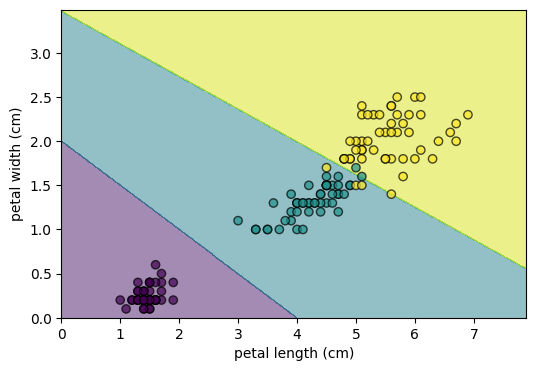

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))

ax.contourf(xpts, ypts, Z, alpha=0.5)

norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

#Let's over-plot training/test data points.
plot_train = ax.scatter(X[:,0], X[:,1], alpha=0.7, c=y, cmap='viridis', 
                        norm=norm, edgecolor='black')

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

### Looking good!

### Classification for non-linear data.

(-1.4, 1.4)

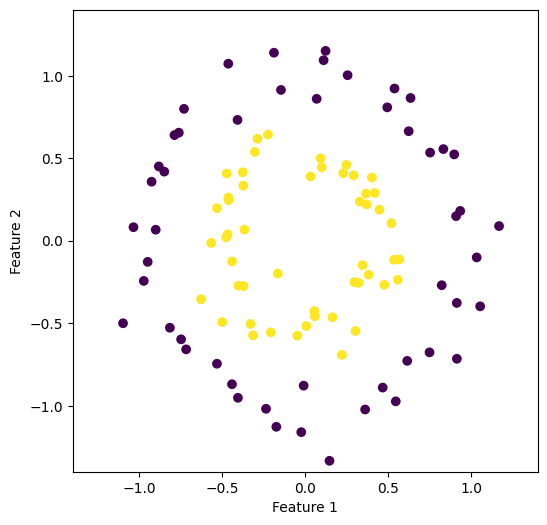

In [45]:
import sklearn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

X,y = sklearn.datasets.make_circles(noise=0.1, factor=0.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_xlim(-1.4,1.4)
ax.set_ylim(-1.4,1.4)

### How do the data look when mapped onto a 3D space?

Text(0.5, 0, 'feature1**2 + feature2**2')

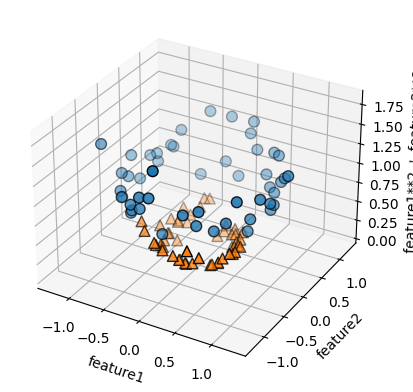

In [53]:
import numpy as np

# add the squared first feature
X_new = np.hstack([X, X[:,0:1]**2 + X[:, 1:2] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d

fig = plt.figure()

# visualize in 3D
ax = fig.add_subplot(projection='3d')

# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], 
           s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], marker='^',
           s=60, edgecolor='k')

ax.set_xlim(-1.4,1.4)
ax.set_ylim(-1.4,1.4)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1**2 + feature2**2")


### Adding the hyperplane.

/Users/jbae/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/var/folders/8x/41xs0j3d4fngs33gt7xzn15w0000gn/T/ipykernel_54919/1865949635.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],
/var/folders/8x/41xs0j3d4fngs33gt7xzn15w0000gn/T/ipykernel_54919/1865949635.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], marker='^',


Text(0.5, 0, 'feature1**2 + feature2**2')

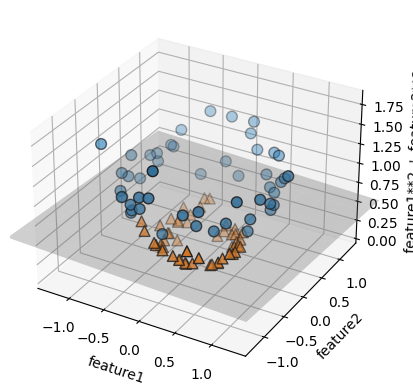

In [55]:
from sklearn.svm import LinearSVC

# Here I'm using a linear version of SVC.
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Show linear decision boundary.
fig = plt.figure()

# visualize in 3D
ax = fig.add_subplot(projection='3d')

xx = np.linspace(X_new[:, 0].min() - 0.5, X_new[:, 0].max() + 0.5, 100)
yy = np.linspace(X_new[:, 1].min() - 0.5, X_new[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3, color='gray')
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlim(-1.4,1.4)
ax.set_ylim(-1.4,1.4)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1**2 + feature2**2")

### This is how the hyperplane looks like in the original 2D space.

(-1.4, 1.4)

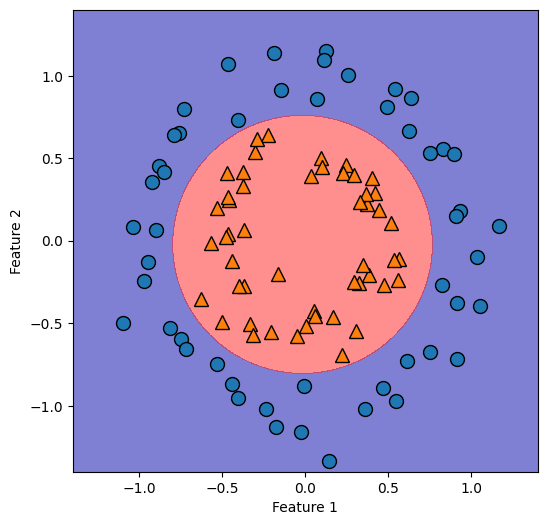

In [56]:
ZZ = XX**2 + YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

fig, ax = plt.subplots(figsize=(6, 6))

ax.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_xlim(-1.4,1.4)
ax.set_ylim(-1.4,1.4)

### How do kNN and DT perform on the same problem?

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Here's kNN.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(10)+1,
              'weights': ['uniform','distance']}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True, 
                           verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best model: KNeighborsClassifier(n_neighbors=1)
Test score: 1.00


(-1.4, 1.4)

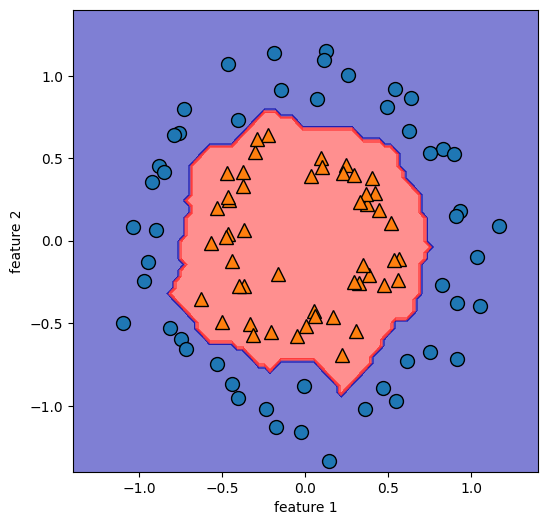

In [59]:
xx = np.linspace(X_new[:, 0].min() - 0.5, X_new[:, 0].max() + 0.5, 100)
yy = np.linspace(X_new[:, 1].min() - 0.5, X_new[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)

#This is to make a data structure that is consistent with the training/test datasets.
Z = grid_search.best_estimator_.predict(np.c_[XX.ravel(), YY.ravel()])

#Now let's reshape to match with the meshgrid.
Z = Z.reshape(XX.shape)

fig, ax = plt.subplots(figsize=(6, 6))

ax.contourf(XX, YY, Z, alpha=0.5, cmap=mglearn.cm2)

#Let's over-plot training/test data points.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_xlim(-1.4,1.4)
ax.set_ylim(-1.4,1.4)

### Here's DT.

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(10)+1,
              'criterion': ['gini','entropy']}

# By defaults, sklearn's GridSearchCV will use stratified k-fold for classification problems.
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True, 
                           verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 4}
Best model: DecisionTreeClassifier(criterion='entropy', max_depth=4)
Test score: 1.00


(-1.4, 1.4)

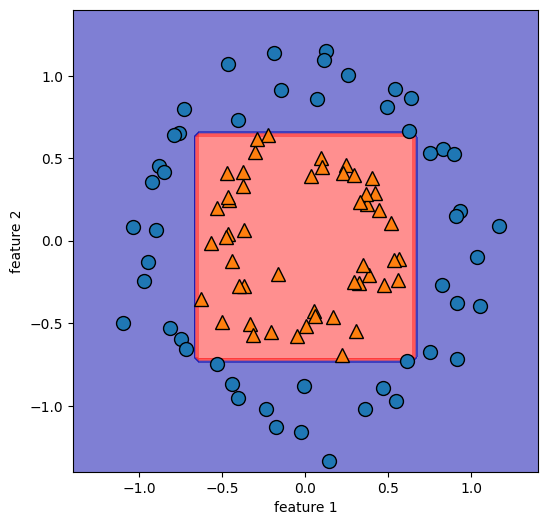

In [61]:
xx = np.linspace(X_new[:, 0].min() - 0.5, X_new[:, 0].max() + 0.5, 100)
yy = np.linspace(X_new[:, 1].min() - 0.5, X_new[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)

#This is to make a data structure that is consistent with the training/test datasets.
Z = grid_search.best_estimator_.predict(np.c_[XX.ravel(), YY.ravel()])

#Now let's reshape to match with the meshgrid.
Z = Z.reshape(XX.shape)

fig, ax = plt.subplots(figsize=(6, 6))

ax.contourf(XX, YY, Z, alpha=0.5, cmap=mglearn.cm2)

#Let's over-plot training/test data points.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_xlim(-1.4,1.4)
ax.set_ylim(-1.4,1.4)

### Let's try SVM on another non-linear problem. This time two moons instead of two circles.

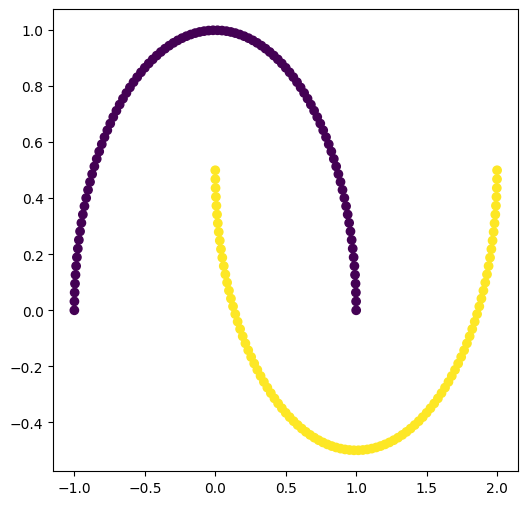

In [62]:
import sklearn
import mglearn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

# This is what it looks like without noise.
X, y = sklearn.datasets.make_moons(n_samples=200, noise=0., random_state=0)

#mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.scatter(X[:, 0], X[:, 1], c=y)

#ax.set_xlabel("Feature 1")
#ax.set_ylabel("Feature 2")

Text(0, 0.5, 'Feature 2')

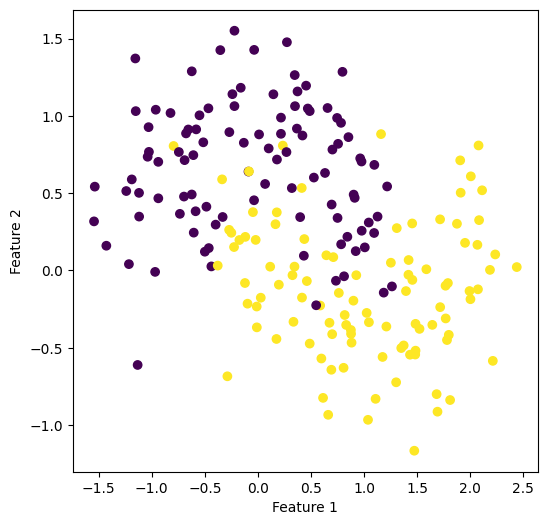

In [63]:
import sklearn
import mglearn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

# Now I'm adding some noise.
X,y = sklearn.datasets.make_moons(n_samples=200, noise=0.3, random_state=0)

#mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.scatter(X[:, 0], X[:, 1], c=y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

### Split the data into training and test datasets.

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Run GridSearchCV and find the best SVM model. We will use "rbf" kernel and vary hyperparameter 'C' and 'gamma'.

In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1., 10., 100.],
              'gamma': [0.01, 0.1, 1., 10., 100.]}

grid_search = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=5, 
                           return_train_score=True, verbose=3)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END C=0.01, gamma=0.01;, score=(train=0.525, test=0.500) total time=   0.0s
[CV 2/5] END C=0.01, gamma=0.01;, score=(train=0.525, test=0.500) total time=   0.0s
[CV 3/5] END C=0.01, gamma=0.01;, score=(train=0.517, test=0.533) total time=   0.0s
[CV 4/5] END C=0.01, gamma=0.01;, score=(train=0.517, test=0.533) total time=   0.0s
[CV 5/5] END C=0.01, gamma=0.01;, score=(train=0.517, test=0.533) total time=   0.0s
[CV 1/5] END C=0.01, gamma=0.1;, score=(train=0.525, test=0.500) total time=   0.0s
[CV 2/5] END C=0.01, gamma=0.1;, score=(train=0.525, test=0.500) total time=   0.0s
[CV 3/5] END C=0.01, gamma=0.1;, score=(train=0.517, test=0.533) total time=   0.0s
[CV 4/5] END C=0.01, gamma=0.1;, score=(train=0.517, test=0.533) total time=   0.0s
[CV 5/5] END C=0.01, gamma=0.1;, score=(train=0.517, test=0.533) total time=   0.0s
[CV 1/5] END C=0.01, gamma=1.0;, score=(train=0.525, test=0.500) total time=   0.0s
[CV 2/5] 

### Let's make a heatmap and see if we are converged with the hyperparameters.

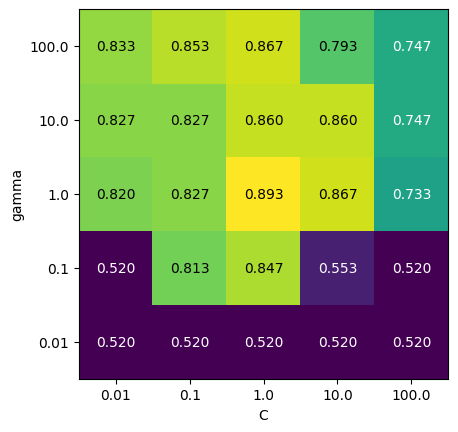

In [66]:
import pandas as pd
import numpy as np

results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(5,5)

mglearn.tools.heatmap(scores, xlabel='C', xticklabels=param_grid['C'],
                     ylabel='gamma', yticklabels=param_grid['gamma'], cmap='viridis', fmt="%.3f")

Text(50.722222222222214, 0.5, 'gamma')

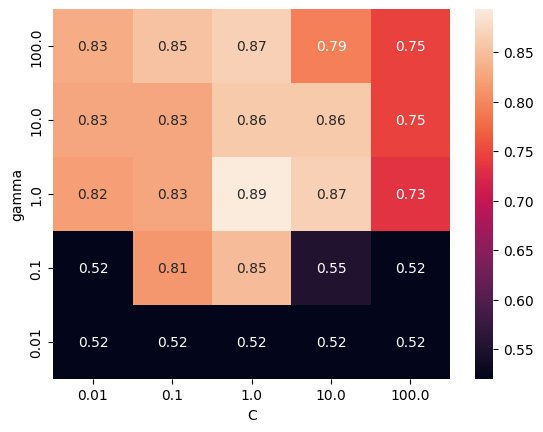

In [68]:
import pandas as pd
import seaborn as sns

results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(5,5)

toplot_x = list(grid_search.param_grid.keys())[0]
toplot_y = list(grid_search.param_grid.keys())[1]

ax = sns.heatmap(scores[::-1,:], annot=True, fmt=".2f", 
                 xticklabels=np.array(grid_search.param_grid[toplot_x]).astype(str),
                 yticklabels=np.array(grid_search.param_grid[toplot_y][::-1]).astype(str)
                 )
#ax = sns.heatmap(scores, annot=True, fmt=".2f", 
#                 xticklabels=np.array(grid_search.param_grid[toplot_x]).astype(str),
#                 yticklabels=np.array(grid_search.param_grid[toplot_y]).astype(str)
#                 )
ax.set_xlabel(toplot_x)
ax.set_ylabel(toplot_y)

In [69]:
#grid_search.param_grid[toplot_y]
scores[:,::-1]

array([[0.52      , 0.52      , 0.52      , 0.52      , 0.52      ],
       [0.52      , 0.55333333, 0.84666667, 0.81333333, 0.52      ],
       [0.73333333, 0.86666667, 0.89333333, 0.82666667, 0.82      ],
       [0.74666667, 0.86      , 0.86      , 0.82666667, 0.82666667],
       [0.74666667, 0.79333333, 0.86666667, 0.85333333, 0.83333333]])

### Using the best model, plot the decision boundary.

Text(0, 0.5, 'feature 2')

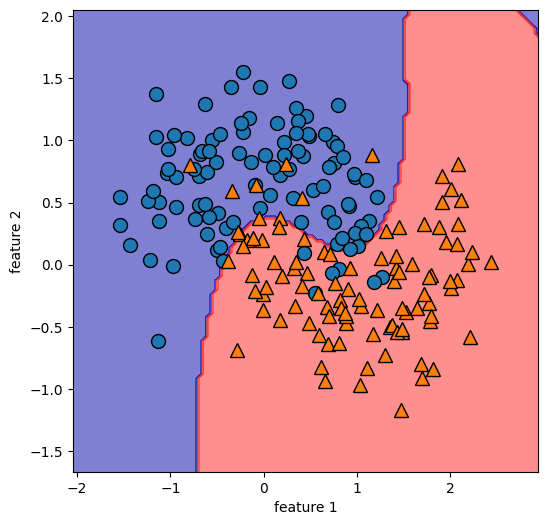

In [70]:
xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)
Z = grid_search.best_estimator_.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

fig, ax = plt.subplots(figsize=(6, 6))

ax.contourf(XX, YY, Z, alpha=0.5, cmap=mglearn.cm2)

#Let's over-plot training/test data points.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')

### What is your best hyperpameters? What is your test score? How does the decision boundary look like?

### How do kNN and DT do on this problem? Choose kNN or DT and complete the cells below.

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(30)+1,
              'weights': ['uniform','distance']}

# By defaults, sklearn's GridSearchCV will use stratified k-fold for classification problems.
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True, 
                           verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'n_neighbors': 18, 'weights': 'distance'}
Best model: KNeighborsClassifier(n_neighbors=18, weights='distance')
Test score: 0.96


### Let's plot the decision boundary.

Text(0, 0.5, 'feature 2')

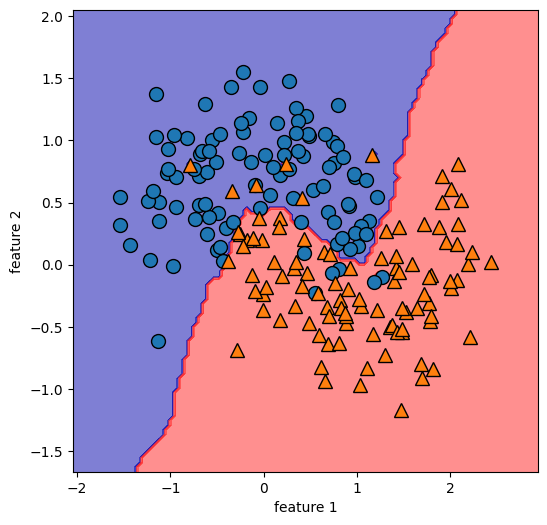

In [74]:
xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)

#This is to make a data structure that is consistent with the training/test datasets.
Z = grid_search.best_estimator_.predict(np.c_[XX.ravel(), YY.ravel()])

#Now let's reshape to match with the meshgrid.
Z = Z.reshape(XX.shape)

fig, ax = plt.subplots(figsize=(6, 6))

ax.contourf(XX, YY, Z, alpha=0.5, cmap=mglearn.cm2)

#Let's over-plot training/test data points.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')

### Below is with DT.

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(30)+1,
              'criterion': ['gini','entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, return_train_score=True, 
                           verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'criterion': 'gini', 'max_depth': 4}
Best model: DecisionTreeClassifier(max_depth=4, random_state=0)
Test score: 0.84


### Let's plot the decision boundary.

Text(0, 0.5, 'feature 2')

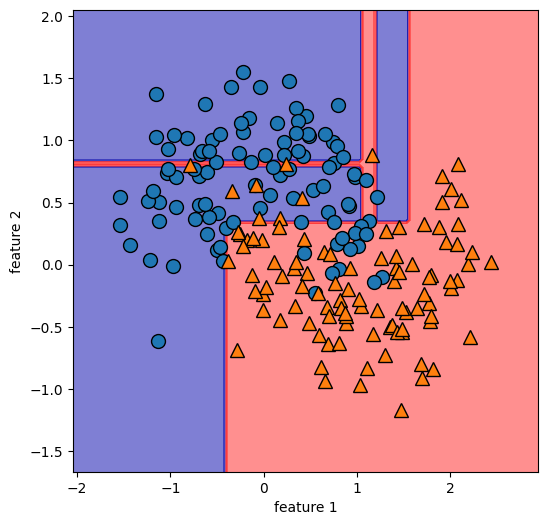

In [76]:
xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)
Z = grid_search.best_estimator_.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

fig, ax = plt.subplots(figsize=(6, 6))

ax.contourf(XX, YY, Z, alpha=0.5, cmap=mglearn.cm2)

#Let's over-plot training/test data points.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')

## Permutation importance

### Let's load and split the Iris dataset.

In [80]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Let's find the best SVM model.

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Remember that we need feature scaling for SVM.
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('SVM', SVC(kernel='rbf'))
])

# Choose hyperparameters to optimize.
param_grid = {'SVM__C': [0.01, 0.1, 1., 10., 100.],
              'SVM__gamma': [0.01, 0.1, 1., 10., 100.]}

grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, verbose=3)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END SVM__C=0.01, SVM__gamma=0.01;, score=(train=0.371, test=0.348) total time=   0.0s
[CV 2/5] END SVM__C=0.01, SVM__gamma=0.01;, score=(train=0.371, test=0.348) total time=   0.0s
[CV 3/5] END SVM__C=0.01, SVM__gamma=0.01;, score=(train=0.367, test=0.364) total time=   0.0s
[CV 4/5] END SVM__C=0.01, SVM__gamma=0.01;, score=(train=0.367, test=0.364) total time=   0.0s
[CV 5/5] END SVM__C=0.01, SVM__gamma=0.01;, score=(train=0.356, test=0.409) total time=   0.0s
[CV 1/5] END SVM__C=0.01, SVM__gamma=0.1;, score=(train=0.371, test=0.348) total time=   0.0s
[CV 2/5] END SVM__C=0.01, SVM__gamma=0.1;, score=(train=0.371, test=0.348) total time=   0.0s
[CV 3/5] END SVM__C=0.01, SVM__gamma=0.1;, score=(train=0.367, test=0.364) total time=   0.0s
[CV 4/5] END SVM__C=0.01, SVM__gamma=0.1;, score=(train=0.367, test=0.364) total time=   0.0s
[CV 5/5] END SVM__C=0.01, SVM__gamma=0.1;, score=(train=0.356, test=0.409) total time= 

### Let's compute the permutation importance.

In [82]:
# We first fit our best model.

model = grid_search.best_estimator_[1]
model.fit(X_train, y_train)

# We then compute the permutation importance using the test data.
from sklearn.inspection import permutation_importance

r = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)

### Let's print out what's in the output.

In [83]:
r

{'importances_mean': array([0.01578947, 0.00789474, 0.54210526, 0.12368421]),
 'importances_std': array([0.02105263, 0.01685033, 0.05545081, 0.03730907]),
 'importances': array([[ 0.        ,  0.05263158,  0.05263158,  0.        ,  0.02631579,
          0.        ,  0.        ,  0.        ,  0.02631579,  0.        ],
        [ 0.        ,  0.02631579,  0.        ,  0.02631579,  0.        ,
          0.        ,  0.02631579,  0.02631579, -0.02631579,  0.        ],
        [ 0.52631579,  0.57894737,  0.52631579,  0.60526316,  0.42105263,
          0.63157895,  0.55263158,  0.55263158,  0.52631579,  0.5       ],
        [ 0.18421053,  0.18421053,  0.10526316,  0.10526316,  0.13157895,
          0.10526316,  0.10526316,  0.13157895,  0.05263158,  0.13157895]])}

### Let's make a feature importance plot.

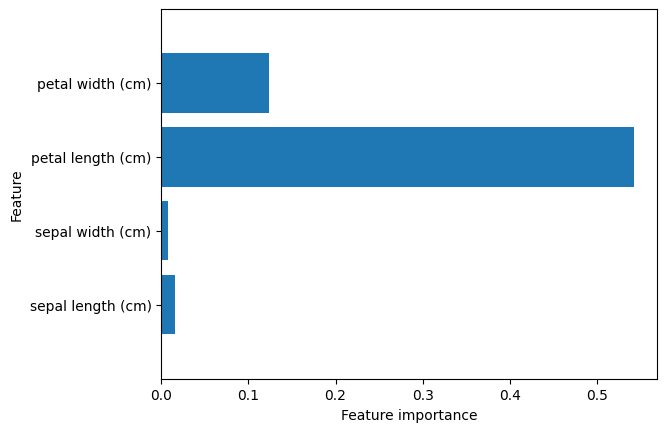

In [84]:
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), r.importances_mean, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(r)

### We can also make a box plot.

Text(0, 0.5, 'Feature')

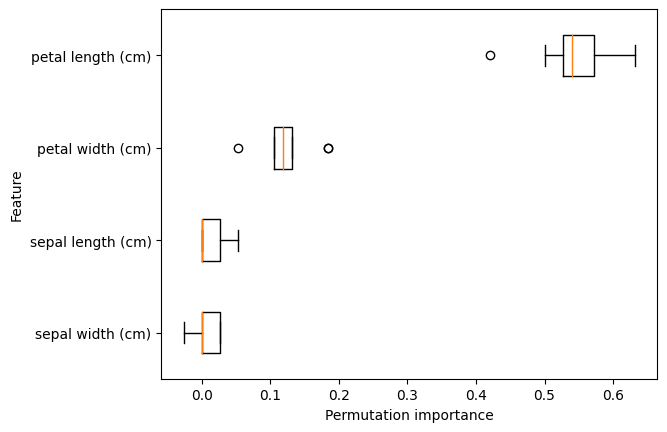

In [85]:
sorted_idx = r.importances_mean.argsort()

fig, ax = plt.subplots()

ax.boxplot(r.importances[sorted_idx].T,
           vert=False, labels=np.array(iris.feature_names)[sorted_idx])

ax.set_xlabel("Permutation importance")
ax.set_ylabel("Feature")
